# **Import library**

In [347]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold,cross_val_score
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn import metrics

# **Import Dataset**

In [348]:
data = pd.read_csv('/content/data.csv')

# **Header of Dataset**

In [349]:
data.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# **Information about Dataset**

In [350]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

# **Data Cleaning**

1) Remove irrelevant column: column id

2) Convert M (malignant) / B (benign) to 1 / 0

3) Remove outliers & Handling missing values



# **1) Remove irrelevant column: column id**

In [351]:
data.drop(columns = [data.columns[0]] ,  axis=1,  inplace=True)

# **2) Convert M (malignant) / B (benign) to 1 / 0**

In [352]:
data.replace(['M', 'B', 'm', 'b'], [1, 0, 1, 0], inplace=True)
print(data)

     diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0            1        17.99         10.38          122.80     1001.0   
1            1        20.57         17.77          132.90     1326.0   
2            1        19.69         21.25          130.00     1203.0   
3            1        11.42         20.38           77.58      386.1   
4            1        20.29         14.34          135.10     1297.0   
..         ...          ...           ...             ...        ...   
564          1        21.56         22.39          142.00     1479.0   
565          1        20.13         28.25          131.20     1261.0   
566          1        16.60         28.08          108.30      858.1   
567          1        20.60         29.33          140.10     1265.0   
568          0         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010  

# **3) Remove outliers & Handling missing values**

In [353]:
X=data.drop(['diagnosis'],axis=1)
Y=data['diagnosis']


In [354]:
print(data.isnull().sum())

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


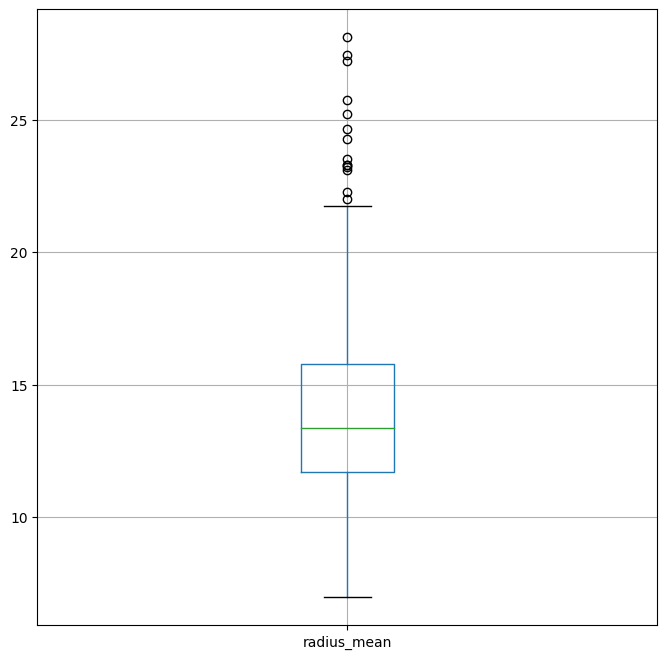

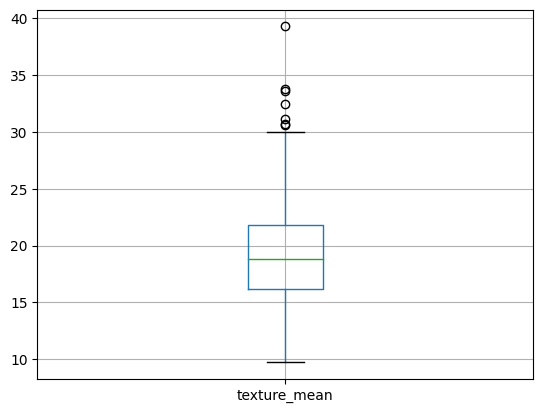

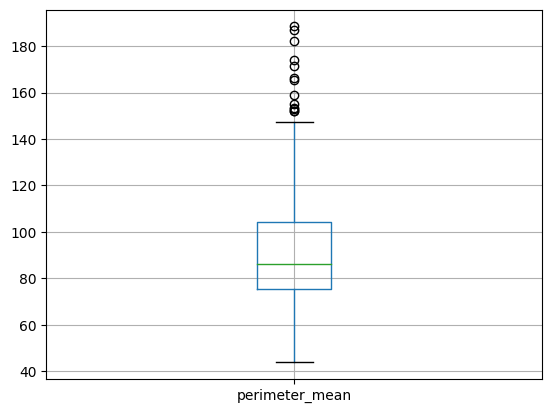

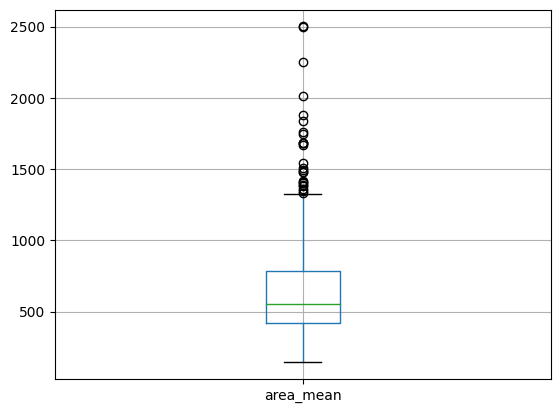

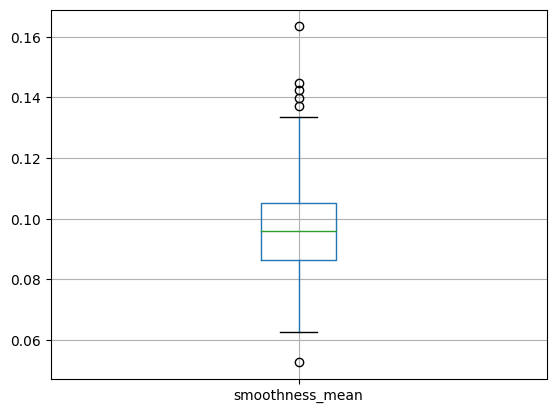

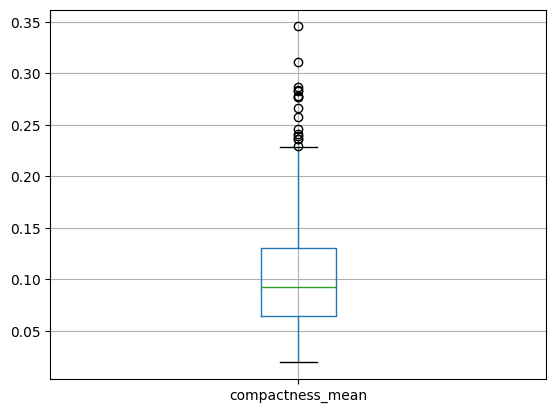

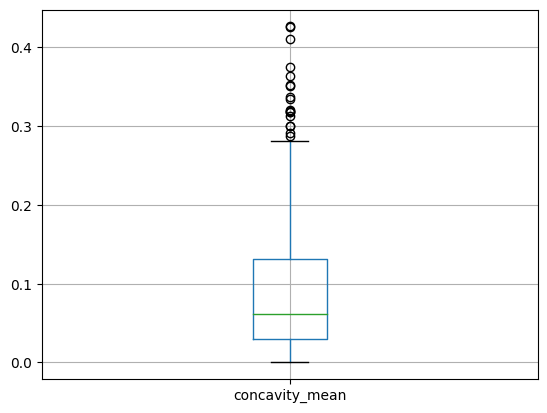

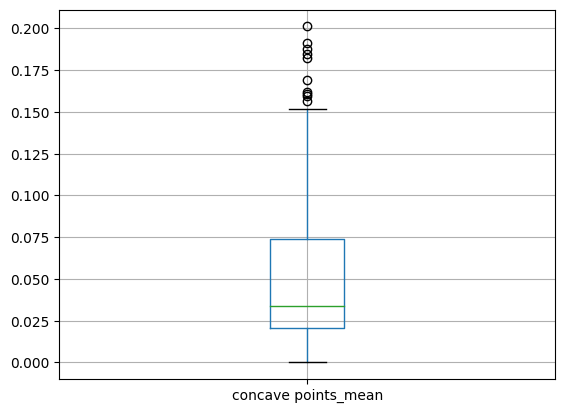

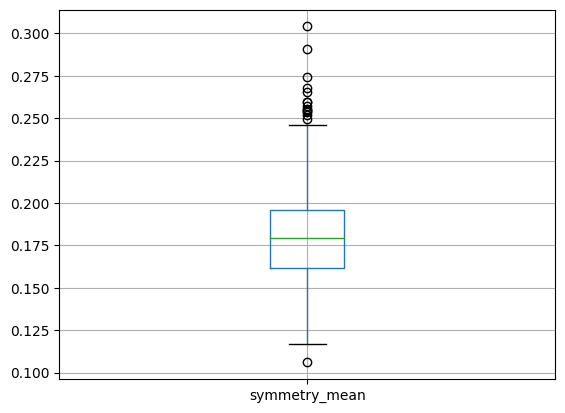

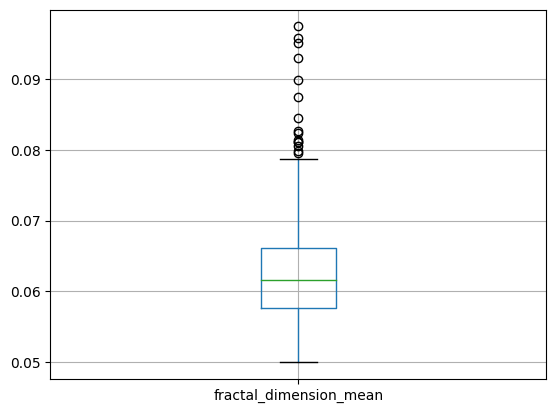

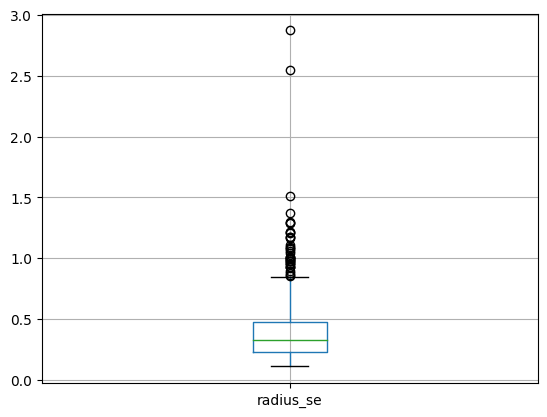

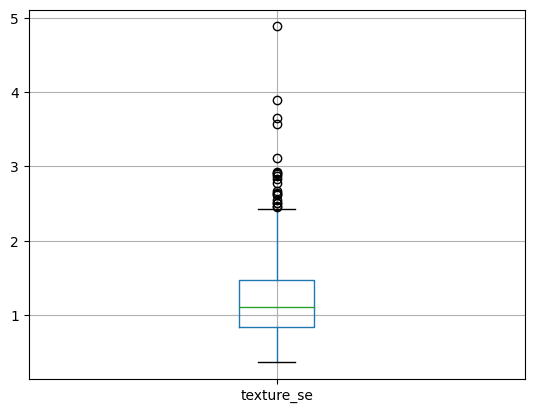

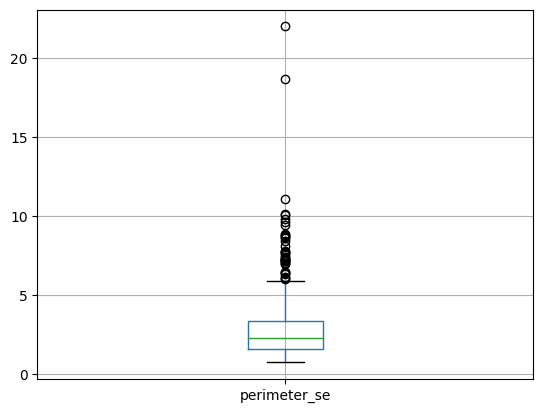

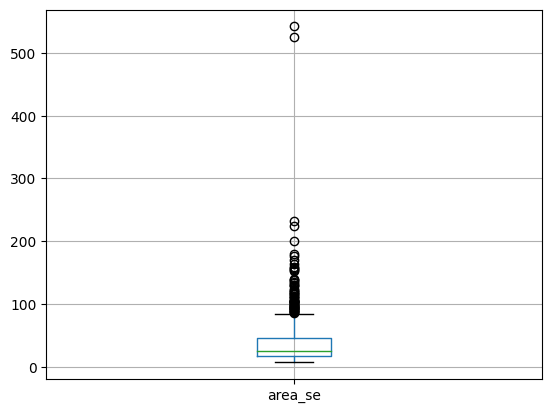

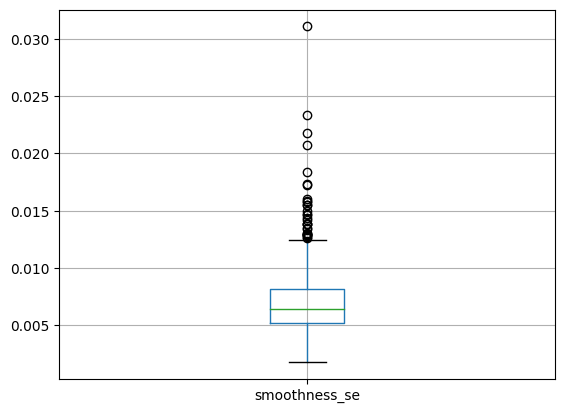

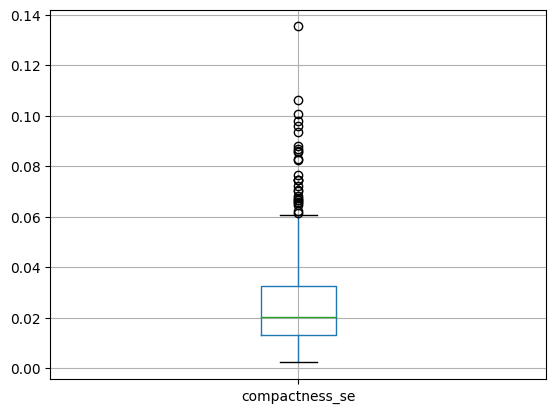

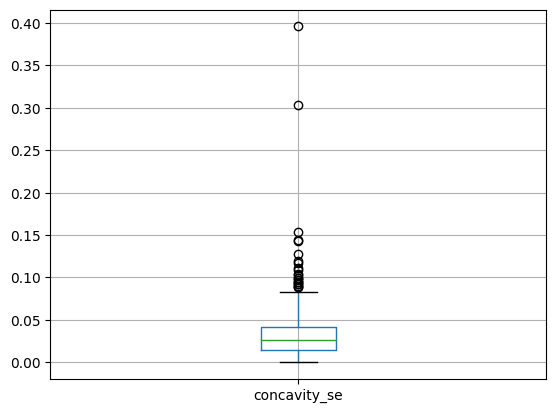

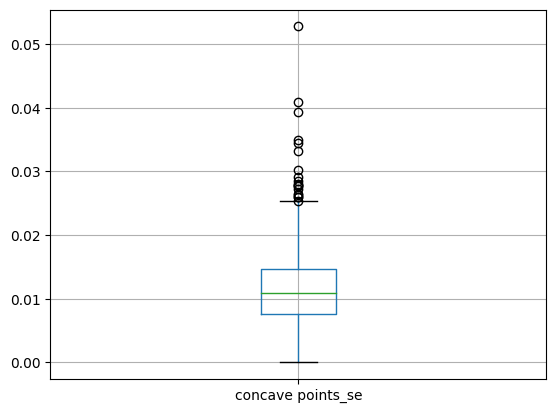

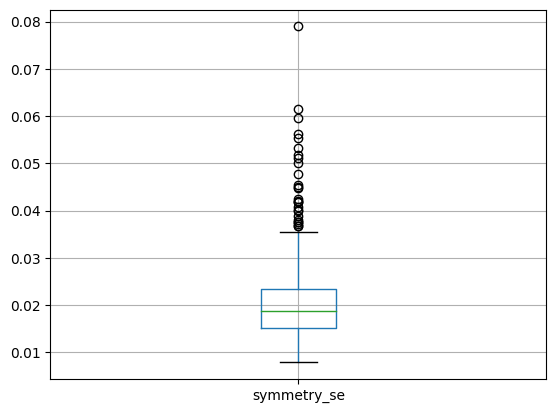

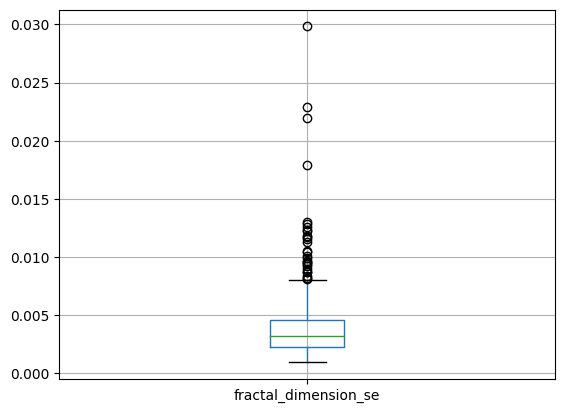

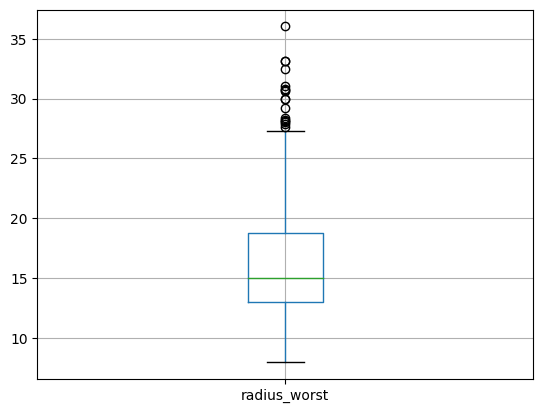

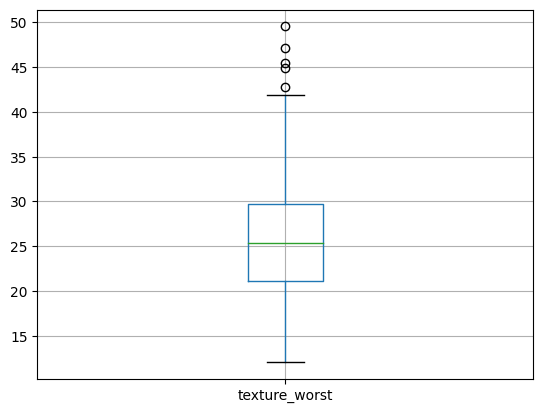

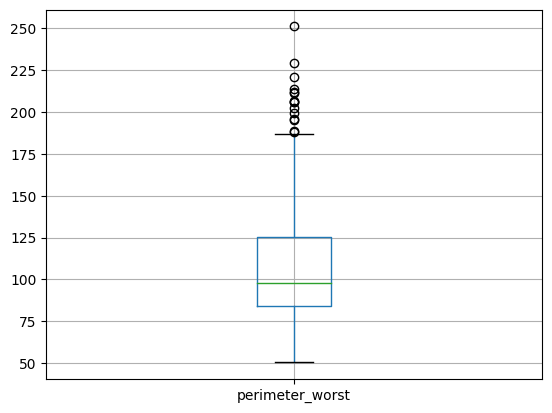

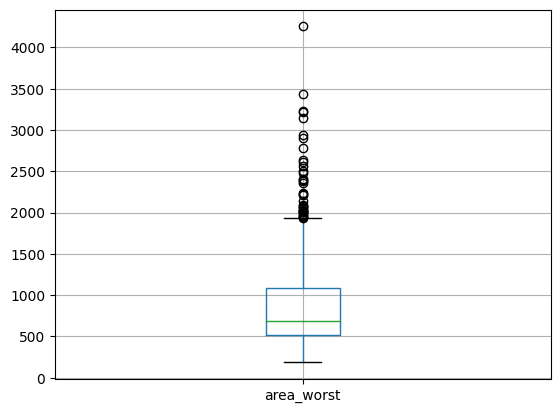

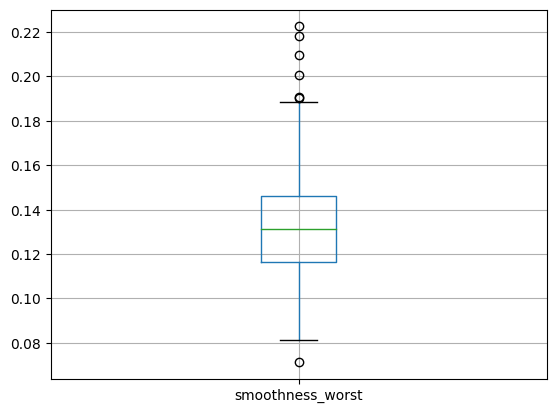

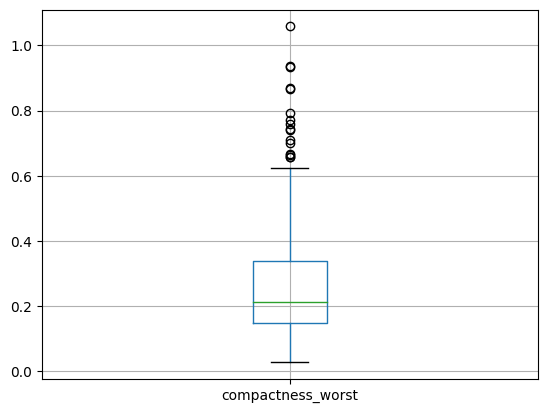

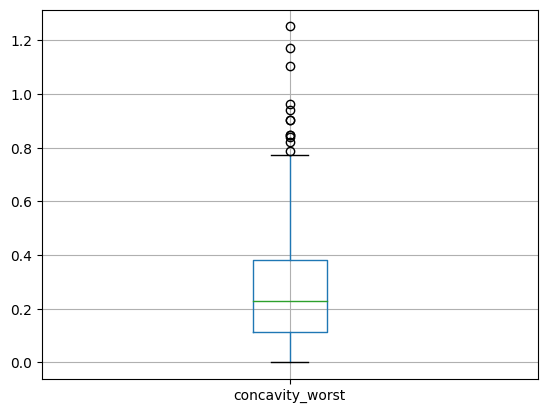

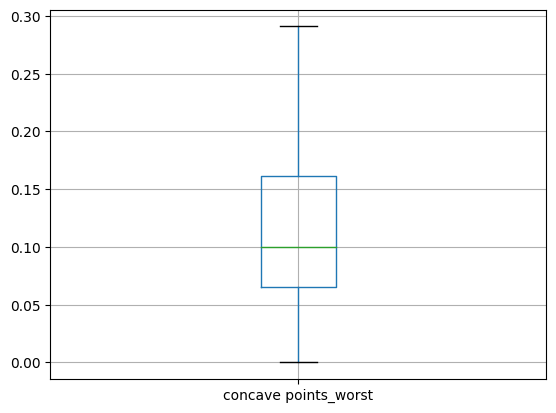

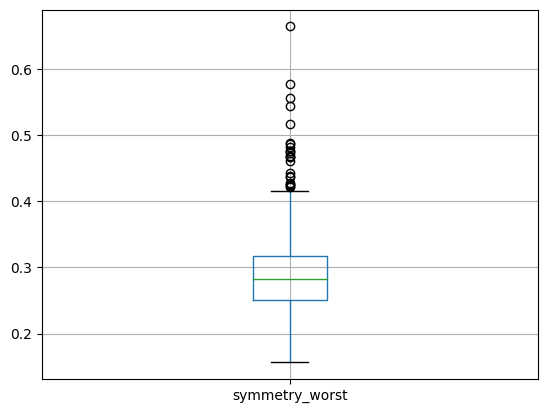

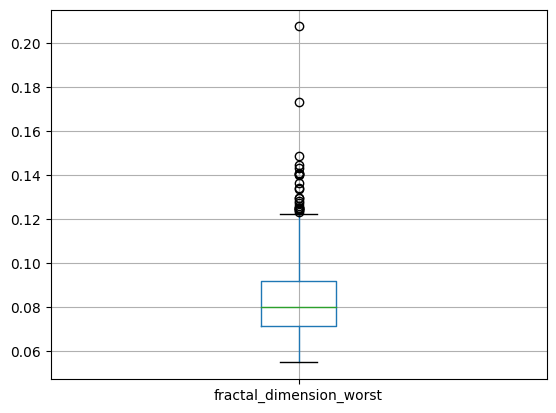

In [ ]:
plt.figure(figsize=(8,8))
for i, col in enumerate(X.columns):
  X.boxplot(column = X.columns[i] )
  plt.show()

**Since all of the attributes that we choose contain outliers except concave points_worst , hence we change all of the outliers to null value**

In [ ]:
X=X.drop(['concave points_worst'],axis=1)
for i,col in enumerate(X.columns):
  for x in [col]:
    q3,q1 = np.percentile(data.loc[:,x],[75,25])
    iqr = q3-q1
    upper = q3 + (1.5*iqr)
    lower = q1 - (1.5*iqr)  
    data.loc[data[x]<lower,x] = np.nan
    data.loc[data[x]>upper,x] = np.nan

**So, before we change the outliers to null value, we use isnull().sum to returns the number of missing values in this dataset**

**Replace outliers to NaN valuesvalues**

In [ ]:
for i,col in enumerate(X.columns):
  data[col].fillna((data[col].mean()), inplace=True)
print(data.isnull().sum())

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


# **Description of Dataset**

In [ ]:
data.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,13.865223,19.117847,90.235576,608.214890,0.096002,0.099594,0.080551,0.046656,0.179200,...,15.836611,25.497465,104.522256,778.653184,0.131698,0.238973,0.257621,0.114606,0.282075,0.081596
std,0.483918,3.098985,4.003516,21.397414,267.462401,0.013126,0.044533,0.064891,0.034856,0.023715,...,4.137642,5.837784,29.068300,385.536111,0.021360,0.127615,0.182286,0.065732,0.046602,0.013652
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.062510,0.019380,0.000000,0.000000,0.116700,...,7.930000,12.020000,50.410000,185.200000,0.081250,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086410,0.064920,0.029560,0.020310,0.162000,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095920,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131400,0.211900,0.226700,0.099930,0.282075,0.080040
75%,1.000000,15.460000,21.600000,102.400000,710.600000,0.104900,0.127500,0.116800,0.068470,0.194300,...,17.790000,29.410000,120.300000,906.600000,0.145100,0.315000,0.372800,0.161400,0.310900,0.089600
max,1.000000,21.750000,29.970000,147.300000,1326.000000,0.133500,0.228400,0.281000,0.152000,0.245900,...,27.320000,41.850000,186.800000,1933.000000,0.188300,0.624700,0.772700,0.291000,0.415400,0.122400


# **Data Visualization**

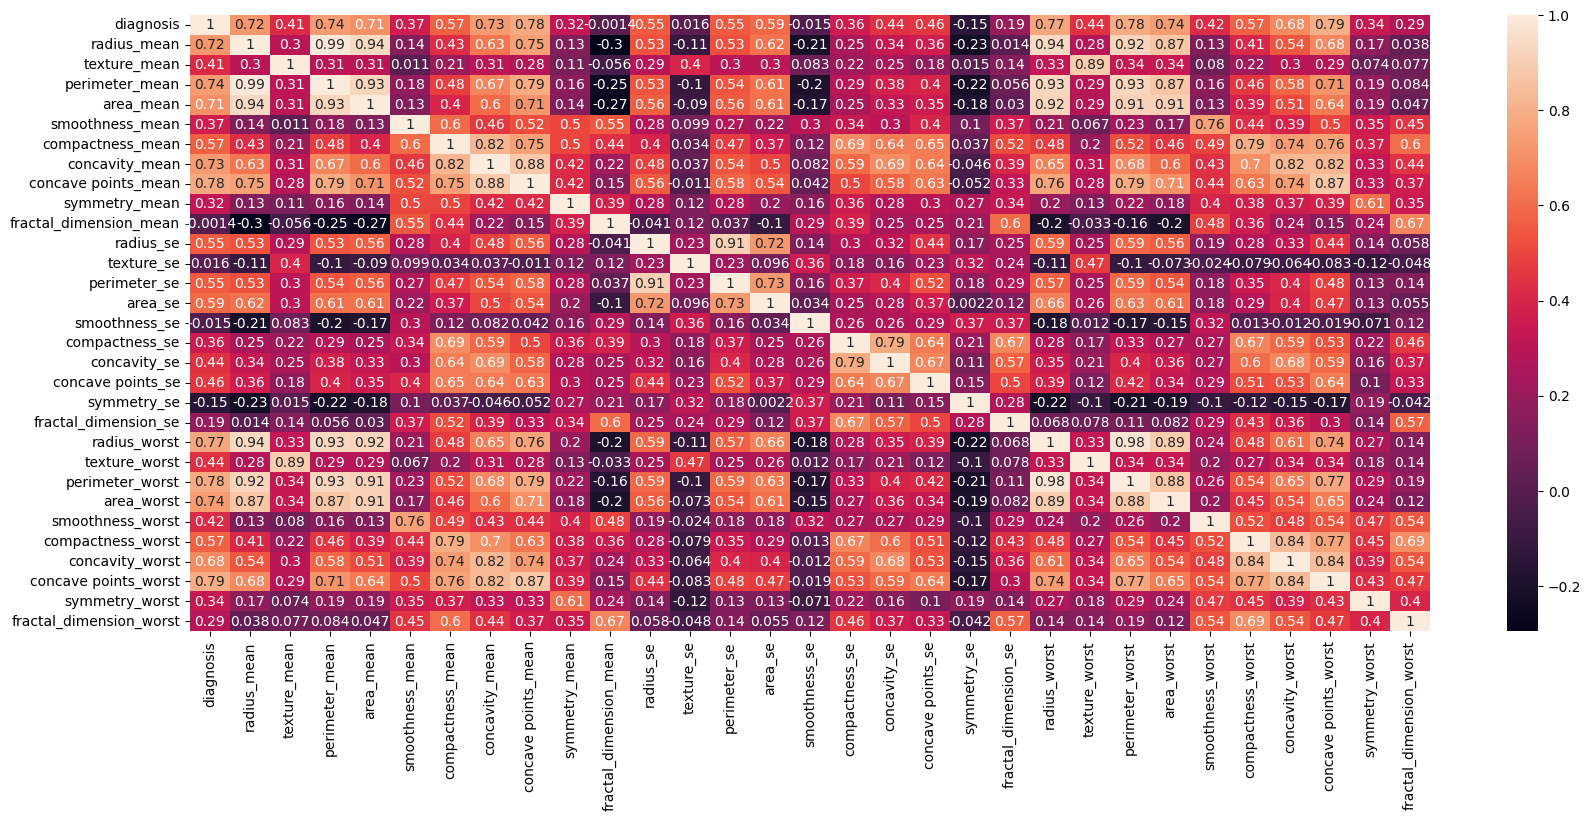

In [ ]:
corr = data.corr()
plt.figure(figsize=(20, 8))
corr_map = sns.heatmap(data.corr(), annot=True)

# **From the correlation heatmap above, we can conclude that...**



1.  area_mean, radius_mean and perimeter_mean are highly correlated with each other.

2. area_worst, radius_worst and perimeter_worst are highly correlated with each other.

3. Besides that, concave points_mean and concave points_worst also have strong correlation relationship with diagnosis.

In [ ]:
data["diagnosis"].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

<Axes: xlabel='diagnosis', ylabel='count'>

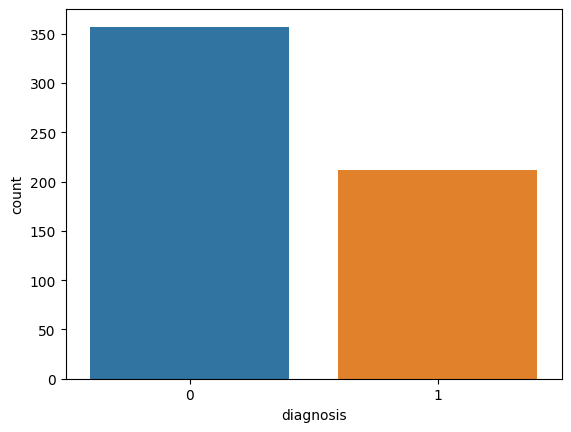

In [ ]:
sns.countplot(x=data["diagnosis"])

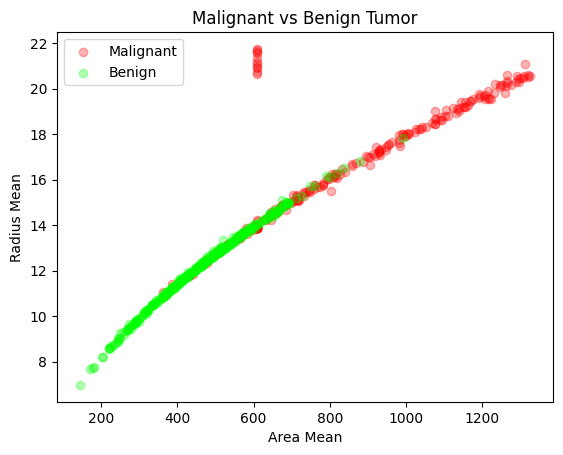

In [ ]:
M = data[data.diagnosis == 1]
B = data[data.diagnosis == 0]
plt.title("Malignant vs Benign Tumor")
plt.xlabel("Area Mean")
plt.ylabel("Radius Mean")
plt.scatter(M.area_mean, M.radius_mean, color = "red", label = "Malignant", alpha = 0.3)
plt.scatter(B.area_mean, B.radius_mean, color = "lime", label = "Benign", alpha = 0.3)
plt.legend()
plt.show()

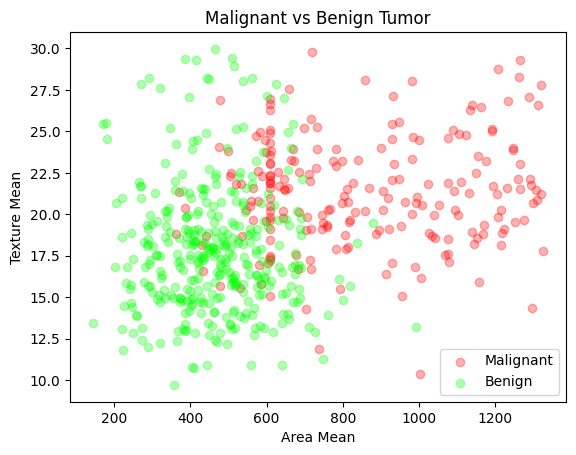

In [ ]:
M = data[data.diagnosis == 1]
B = data[data.diagnosis == 0]
plt.title("Malignant vs Benign Tumor")
plt.xlabel("Area Mean")
plt.ylabel("Texture Mean")
plt.scatter(M.area_mean, M.texture_mean, color = "red", label = "Malignant", alpha = 0.3)
plt.scatter(B.area_mean, B.texture_mean, color = "lime", label = "Benign", alpha = 0.3)
plt.legend()
plt.show()

# **Split the data into training and testing sets:**

In [ ]:
X=data.drop(['diagnosis'],axis=1)
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 42)
X_train.shape, X_test.shape
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Fit the dataset into Gaussian Naive Bayes model by using Standard Scaler(BEST)**

In [ ]:
model = GaussianNB()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

# **Evaluate the model**

Accuracy: 98.25 %
Precision: 0.98
Recall: 0.98
F1-score: 0.98


<Axes: >

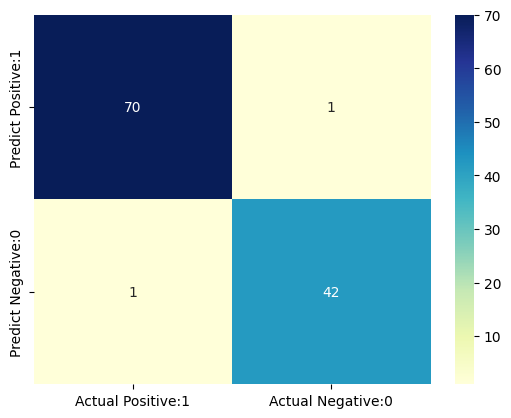

In [ ]:
acc = metrics.accuracy_score(Y_test,Y_pred)*100
pre = metrics.precision_score(Y_test,Y_pred)
rec = metrics.recall_score(Y_test,Y_pred)
f1 = 	metrics.f1_score(Y_test,Y_pred)
cf = metrics.confusion_matrix(Y_test,Y_pred)

print("Accuracy: %.2f" % acc,"%")
print("Precision: %.2f" % pre)
print("Recall: %.2f" % rec)
print("F1-score: %.2f" % f1)

cm_matrix = pd.DataFrame(data=cf, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')


In [ ]:
cv = KFold(n_splits=5,shuffle=True,random_state=0)
acc_total = cross_val_score(model,X_test,Y_test,cv=cv)
mean_acc = acc_total.mean()*100
print("Mean Accuracy using cross validation: %.2f" % mean_acc,"%")

Mean Accuracy using cross validation: 98.26 %


## **Predict future value**

In [ ]:
#Prediction from given test data
print(Y_pred)

[0 1 1 0 0 1 1 1 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1
 0 0 0 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 1
 0 0 1]


# **Fit the dataset into Bernoulli Naive Bayes model by using Standard Scaler**

In [ ]:
model = BernoulliNB()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

# **Evaluate the model**

Accuracy: 97.37 %
Precision: 0.95
Recall: 0.98
F1-score: 0.97


<Axes: >

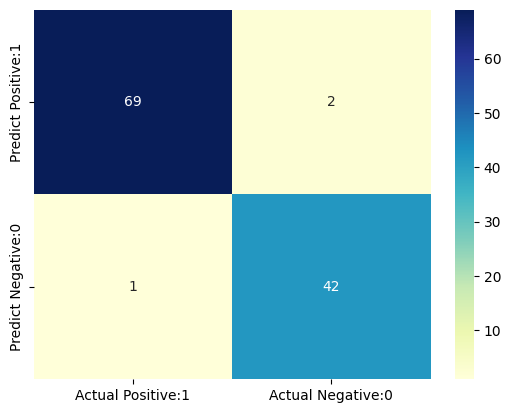

In [ ]:
acc = metrics.accuracy_score(Y_test,Y_pred)*100
pre = metrics.precision_score(Y_test,Y_pred)
rec = metrics.recall_score(Y_test,Y_pred)
f1 = 	metrics.f1_score(Y_test,Y_pred)
cf = metrics.confusion_matrix(Y_test,Y_pred)

print("Accuracy: %.2f" % acc,"%")
print("Precision: %.2f" % pre)
print("Recall: %.2f" % rec)
print("F1-score: %.2f" % f1)

cm_matrix = pd.DataFrame(data=cf, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
cv = KFold(n_splits=10,shuffle=True,random_state=0)
acc_total = cross_val_score(model,X_test,Y_test,cv=cv)
mean_acc = acc_total.mean()*100
print("Mean Accuracy using cross validation: %.2f" % mean_acc,"%")

Mean Accuracy using cross validation: 95.61 %


## **Predict future value**

In [ ]:
print(Y_pred)

[0 1 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1
 0 0 0 1 0 0 1 0 1 1 1 1 0 1 0 0 0 0 1 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 1 0 1
 0 0 1]


# **Split the data into training and testing sets:**

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 42)
X_train.shape, X_test.shape
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Fit the dataset into Gaussian Naive Bayes model by using Min Max Scaler**

In [ ]:
model = GaussianNB()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

# **Evaluate the model**

Accuracy: 98.25 %
Precision: 0.98
Recall: 0.98
F1-score: 0.98


<Axes: >

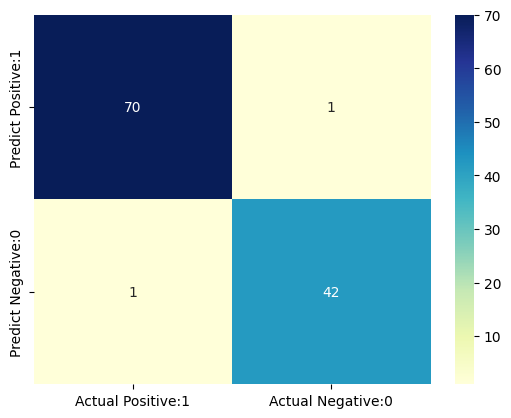

In [ ]:
acc = metrics.accuracy_score(Y_test,Y_pred)*100
pre = metrics.precision_score(Y_test,Y_pred)
rec = metrics.recall_score(Y_test,Y_pred)
f1 = 	metrics.f1_score(Y_test,Y_pred)
cf = metrics.confusion_matrix(Y_test,Y_pred)

print("Accuracy: %.2f" % acc,"%")
print("Precision: %.2f" % pre)
print("Recall: %.2f" % rec)
print("F1-score: %.2f" % f1)

cm_matrix = pd.DataFrame(data=cf, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
cv = KFold(n_splits=10,shuffle=True,random_state=0)
acc_total = cross_val_score(model,X_test,Y_test,cv=cv)
mean_acc = acc_total.mean()*100
print("Mean Accuracy using cross validation: %.2f" % mean_acc,"%")

Mean Accuracy using cross validation: 98.26 %


# **Fit the dataset into Multinomial Naive Bayes model by using Min Max Scaler**

In [ ]:
model = MultinomialNB()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

# **Evaluate the model**

Accuracy: 88.60 %
Precision: 0.94
Recall: 0.74
F1-score: 0.83


<Axes: >

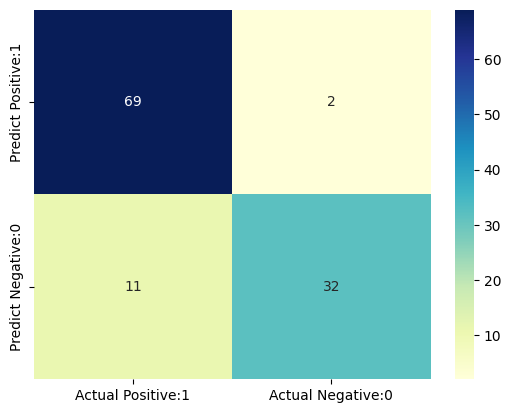

In [ ]:
acc = metrics.accuracy_score(Y_test,Y_pred)*100
pre = metrics.precision_score(Y_test,Y_pred)
rec = metrics.recall_score(Y_test,Y_pred)
f1 = 	metrics.f1_score(Y_test,Y_pred)
cf = metrics.confusion_matrix(Y_test,Y_pred)

print("Accuracy: %.2f" % acc,"%")
print("Precision: %.2f" % pre)
print("Recall: %.2f" % rec)
print("F1-score: %.2f" % f1)

cm_matrix = pd.DataFrame(data=cf, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# **Fit the dataset into Bernoulli Naive Bayes model by using Min Max Scaler**

In [ ]:
model = BernoulliNB()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

# **Evaluate the model**

Accuracy: 62.28 %
Precision: 0.00
Recall: 0.00
F1-score: 0.00


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: >

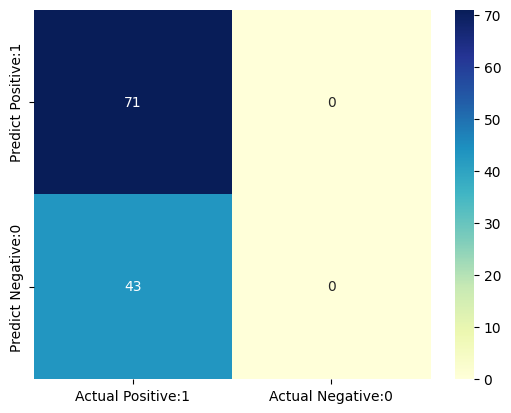

In [ ]:
acc = metrics.accuracy_score(Y_test,Y_pred)*100
pre = metrics.precision_score(Y_test,Y_pred)
rec = metrics.recall_score(Y_test,Y_pred)
f1 = 	metrics.f1_score(Y_test,Y_pred)
cf = metrics.confusion_matrix(Y_test,Y_pred)

print("Accuracy: %.2f" % acc,"%")
print("Precision: %.2f" % pre)
print("Recall: %.2f" % rec)
print("F1-score: %.2f" % f1)

cm_matrix = pd.DataFrame(data=cf, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
cv = KFold(n_splits=5,shuffle=True,random_state=0)
acc_total = cross_val_score(model,X_test,Y_test,cv=cv)
mean_acc = acc_total.mean()*100
print("Mean Accuracy using cross validation: %.2f" % mean_acc,"%")

Mean Accuracy using cross validation: 62.25 %
